In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("C:/Users/Shivani Reddy/Desktop/MyStuff/Projects/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
n_data = data.drop(columns = ["Cabin"])
n_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
mean = (n_data["Age"].mean()*n_data.shape[0])/n_data.shape[0]
n_data["Age"] = n_data["Age"].fillna(int(float(mean)))
n_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
n_data["Embarked"] = n_data["Embarked"].fillna(str(n_data["Embarked"].mode()))
n_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
n_data = n_data.drop(columns=["PassengerId","Name","Ticket"])
n_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
sn_data = n_data[n_data.Survived==1]
sn_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


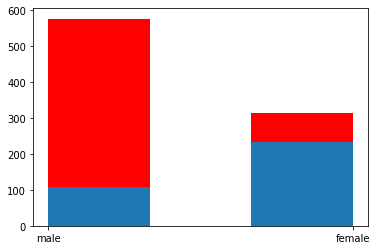

In [17]:
plt.hist(n_data.Sex, bins = n_data.Sex.unique().size*2-1,color="r")
plt.hist(sn_data.Sex,bins=n_data.Sex.unique().size+1)
plt.show()

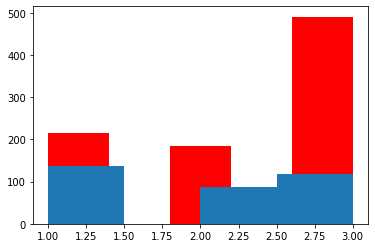

In [20]:
plt.hist(n_data.Pclass, bins=n_data.Pclass.unique().size*2-1,color="r")
plt.hist(sn_data.Pclass, bins = sn_data.Pclass.unique().size+1)
plt.show()

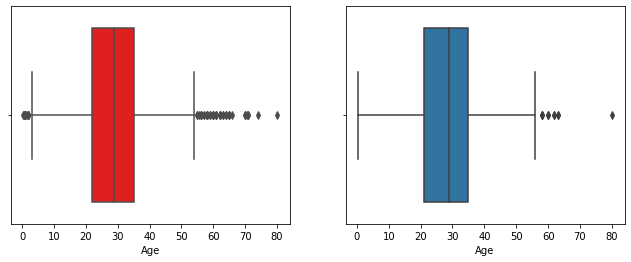

In [30]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.Age, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.Age)
plt.show()

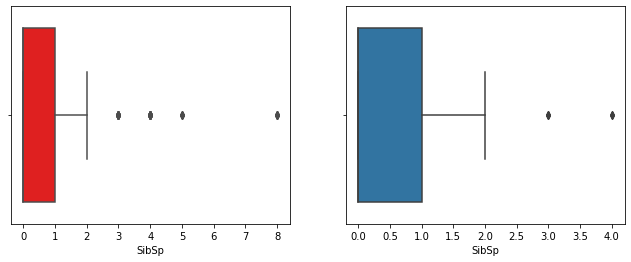

In [31]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.SibSp, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.SibSp)
plt.show()

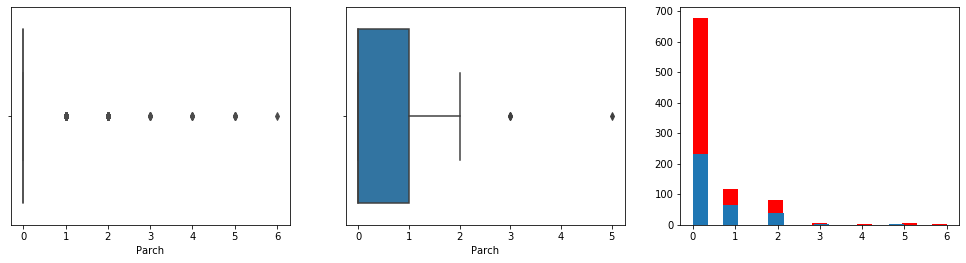

In [35]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.Parch, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.Parch)
plt.subplot(1, 3, 3)
plt.hist(n_data.Parch, bins=17, color="r")
plt.hist(sn_data.Parch, bins=7*2)
plt.show()

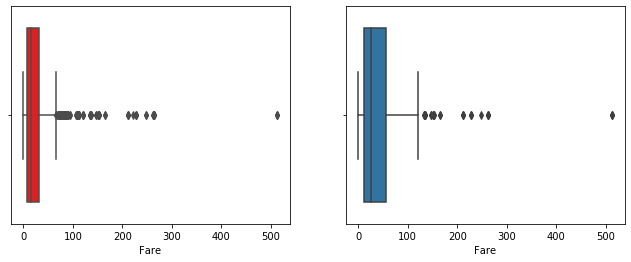

In [36]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.Fare, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.Fare)
plt.show()

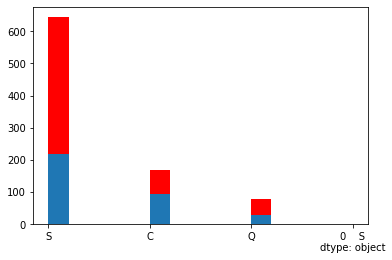

In [37]:
plt.hist(n_data.Embarked, bins=15, color="r")
plt.hist(sn_data.Embarked, bins=15)
plt.show()

In [38]:
n_data_d = pd.get_dummies(n_data)

In [39]:
n_data_d

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0 S\ndtype: object,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,0,1
888,0,3,29.0,1,2,23.4500,1,0,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,0,1,0,0


In [40]:
n_data_d = n_data_d.drop(columns=["Embarked_0    S\ndtype: object"])
n_data_d.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


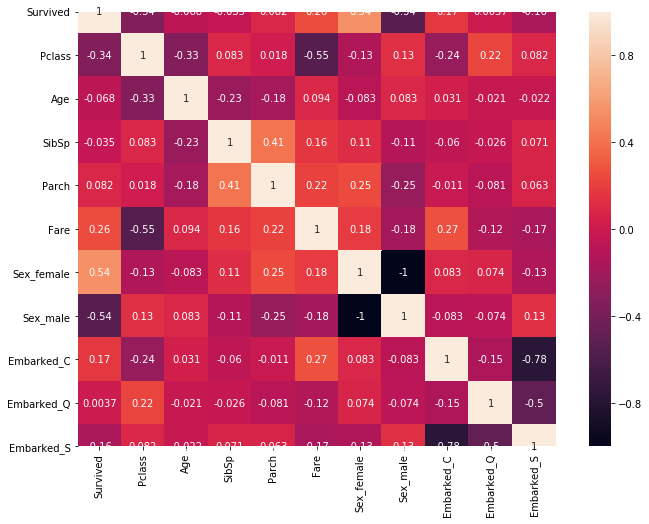

In [41]:
corr_m = n_data_d.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr_m,annot=True,square=True)
plt.show()

In [45]:
high_corr = corr_m.nlargest(10,'Survived')['Survived'].drop(['Survived'])
high_corr

Sex_female    0.543351
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.067814
Embarked_S   -0.155660
Pclass       -0.338481
Name: Survived, dtype: float64

In [46]:
n_data_d.Age = np.log1p(n_data_d.Age)

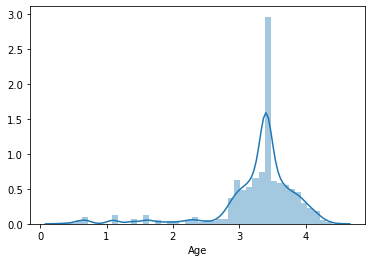

In [47]:
sns.distplot(n_data_d.Age)
plt.show()

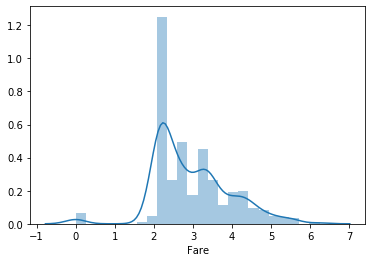

In [48]:
n_data_d.Fare = np.log1p(n_data_d.Fare)
sns.distplot(n_data_d.Fare)
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve, make_scorer
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
import tensorflow as tf
from lightgbm import LGBMClassifier

In [52]:
print("Survived: {} \nDead: {}".format(n_data_d[n_data_d.Survived==1].shape[0],n_data_d[n_data_d.Survived==0].shape[0]))

Survived: 342 
Dead: 549


In [53]:
X, y = n_data_d.drop(columns=["Survived"]), n_data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Random Forest Classifier

In [56]:
roc_auc = make_scorer(roc_auc_score,higher_is_better=True)
rf = RandomForestClassifier(bootstrap=True,n_estimators=700,criterion='entropy')
rf.fit(X_train,y_train)

print("Best score on train data: {:.4f}".format(roc_auc_score(rf.predict(X_train),y_train)))
print("Best score on test data: {}".format(roc_auc_score(rf.predict(X_test), y_test)))

Best score on train data: 0.9785
Best score on test data: 0.780429292929293


In [57]:
for i in np.arange(len(rf.feature_importances_)):
    print("{} : {:.4f}".format(X_train.columns[i],rf.feature_importances_[i]))

Pclass : 0.0857
Age : 0.2674
SibSp : 0.0560
Parch : 0.0391
Fare : 0.2837
Sex_female : 0.1180
Sex_male : 0.1125
Embarked_C : 0.0145
Embarked_Q : 0.0083
Embarked_S : 0.0148


KNN

In [58]:
params = {'n_neighbors':range(1,20), 'leaf_size':range(1,50)}
knn_grid = GridSearchCV(KNeighborsClassifier(), params, scoring = 'roc_auc')
knn_grid.fit(X_train,y_train)

print("Best GridSearchCV params: {}".format(knn_grid.best_params_))
print("Best score on train data: {:.4f}".format(knn_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(knn_grid.predict(X_test), y_test)))

Best GridSearchCV params: {'leaf_size': 7, 'n_neighbors': 18}
Best score on train data: 0.8459
Best score on test data: 0.8260383100608665



In [59]:
params = {'alpha' : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'normalize' : [True, False], 'random_state' : [0, 50, 100, 150, 200]}

r_grid = GridSearchCV(RidgeClassifier(), params, scoring='roc_auc')
r_grid.fit(X_train, y_train)

print("Best GridSearchCV params: {}".format(r_grid.best_params_))
print("Best score on train data: {:.4f}".format(r_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(r_grid.predict(X_test), y_test)))

Best GridSearchCV params: {'alpha': 100, 'normalize': False, 'random_state': 0}
Best score on train data: 0.8516
Best score on test data: 0.7858908780903665



In [60]:
for i in np.arange(len(r_grid.best_estimator_.coef_[0])):
    print("{} : {}".format(X_train.columns[i], r_grid.best_estimator_.coef_[0][i]))

Pclass : -0.1969863292327735
Age : -0.19203515871033955
SibSp : -0.09189779390189533
Parch : -0.03958018585569316
Fare : 0.1283987798271375
Sex_female : 0.3762699585210666
Sex_male : -0.3762699585210667
Embarked_C : 0.05079693172055511
Embarked_Q : 0.013529282612251536
Embarked_S : -0.07058871414838558
